# Exploring Dandiset 001174: Calcium imaging in SMA and M1 of macaques

**Dandiset Version:** 0.250331.2218

---

**Disclaimer:** This notebook was primarily AI-generated and has not been fully verified by human experts. Please exercise caution when interpreting the code, results, and any conclusions drawn. It is intended as a guide for data exploration and may require adjustments for specific research purposes.

---

## Overview of the Dandiset

This Dandiset, titled "Calcium imaging in SMA and M1 of macaques," contains data related to the study of motor cortices in non-human primates using one-photon calcium imaging and miniature microscopes. The researchers aimed to examine activity patterns of projection neurons in deep layers of the supplementary motor (SMA) and primary motor areas (M1) in rhesus macaques. Gradient index lenses were implanted, and GCaMP6f was expressed to image calcium transients while the animals were at rest or engaged in an arm reaching task.

The study focuses on tracking the activity of SMA and M1 neurons, examining cell pairs for synchronous activity, and assessing sequential activation patterns.

**Link to the Dandiset:** [https://dandiarchive.org/dandiset/001174/0.250331.2218](https://dandiarchive.org/dandiset/001174/0.250331.2218)

**Citation:** Galvan, Adriana; Martel, Anne-Caroline; Pittard, Damien; Devergnas, Annaelle; Risk, Benjamin; Nassi, Jonathan J.; Yu, Waylin; Downer, Joshua D. ; Wichmann, Thomas (2025) Calcium imaging in SMA and M1 of macaques (Version 0.250331.2218) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001174/0.250331.2218

## What this notebook covers

This notebook will guide you through the following steps:
1. Listing required Python packages.
2. Connecting to the DANDI archive and loading information about Dandiset 001174.
3. Showing how to list assets (files) within the Dandiset.
4. Loading a specific NWB (Neurodata Without Borders) file from the Dandiset.
5. Displaying some metadata from the loaded NWB file.
6. Summarizing the contents of the NWB file.
7. Visualizing fluorescence traces from identified Regions of Interest (ROIs).
8. Visualizing the spatial footprints (image masks) of these ROIs.
9. Providing a brief summary and potential future directions.

## Required Packages

To run this notebook, you'll need the following Python packages. We assume these are already installed in your environment.

* `dandi` (for interacting with the DANDI Archive)
* `pynwb` (for reading NWB files)
* `h5py` (dependency for NWB and remfile)
* `remfile` (for streaming remote HDF5 files)
* `numpy` (for numerical operations)
* `matplotlib` (for plotting)
* `seaborn` (for enhanced visualizations)

No `pip install` commands are included here.

## Loading the Dandiset using the DANDI API

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "001174"
dandiset_version = "0.250331.2218"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
if 'description' in metadata:
    print(f"Dandiset description: {metadata['description'][:200]}...") # Print first 200 chars

# List some assets in the Dandiset
assets_iterable = dandiset.get_assets()
# Materialize the generator to a list to get the count and to reuse the list
all_assets_list = list(assets_iterable)
asset_count = len(all_assets_list)
print(f"\nFound {asset_count} assets in total.")
print("First 5 assets:")
for asset in islice(all_assets_list, 5): # Iterate over the materialized list
    print(f"- {asset.path} (ID: {asset.identifier}, Size: {asset.size // (1024*1024)} MB)") # Changed asset.asset_id to asset.identifier

Dandiset name: Calcium imaging in SMA and M1 of macaques
Dandiset URL: https://dandiarchive.org/dandiset/001174/0.250331.2218
Dandiset description: The study of motor cortices in non-human primates is relevant to our understanding of human motor control, both in healthy conditions and in movement disorders. Calcium imaging and miniature microscop...

Found 45 assets in total.
First 5 assets:
- sub-V/sub-V_ses-20230309T110929_ophys.nwb (ID: a2b04c7f-f671-4a55-ac36-5df4d842dfc2, Size: 10165 MB)
- sub-Q/sub-Q_ophys.nwb (ID: de07db56-e7f3-4809-9972-755c51598e8d, Size: 753 MB)
- sub-Q/sub-Q_ses-20220922T131747_ophys.nwb (ID: ac161d0e-7642-48bd-9bef-8eff59319d48, Size: 751 MB)
- sub-Q/sub-Q_ses-20221003T131952_ophys.nwb (ID: 9c3678d5-22c3-402c-8cd4-6bc38c4d61e3, Size: 1617 MB)
- sub-Q/sub-Q_ses-20221028T121142_ophys.nwb (ID: b4e6bbf7-0564-4628-b8f0-680fd9b8d4ea, Size: 1485 MB)


## Loading an NWB file

We will now load one of the NWB files from the Dandiset to explore its contents. We'll choose the file `sub-F/sub-F_ses-20240213T110430_ophys.nwb`.

The asset ID for this file is `193fee16-550e-4a8f-aab8-2383f6d57a03`.
The direct download URL for this asset is: `https://api.dandiarchive.org/api/assets/193fee16-550e-4a8f-aab8-2383f6d57a03/download/`.

We will use `pynwb`, `h5py`, and `remfile` to stream the data directly from the DANDI archive.

In [2]:
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the URL for the chosen NWB asset
nwb_asset_url = "https://api.dandiarchive.org/api/assets/193fee16-550e-4a8f-aab8-2383f6d57a03/download/"
selected_asset_path = "sub-F/sub-F_ses-20240213T110430_ophys.nwb"

print(f"Loading NWB file: {selected_asset_path}")
print(f"From URL: {nwb_asset_url}")

# Use remfile to open the remote HDF5 file
remote_nwb_file = remfile.File(nwb_asset_url)
h5_nwb_file = h5py.File(remote_nwb_file, 'r') # Open in read-only mode

# Use PyNWB to read the NWB data
nwb_io = pynwb.NWBHDF5IO(file=h5_nwb_file, mode='r', load_namespaces=True)
nwbfile = nwb_io.read()

print("\nSuccessfully loaded NWB file.")
print(f"NWBFile Identifier: {nwbfile.identifier}")
print(f"Session Description: {nwbfile.session_description}")
print(f"Session Start Time: {nwbfile.session_start_time}")
print(f"Subject ID: {nwbfile.subject.subject_id if nwbfile.subject else 'N/A'}")

Loading NWB file: sub-F/sub-F_ses-20240213T110430_ophys.nwb
From URL: https://api.dandiarchive.org/api/assets/193fee16-550e-4a8f-aab8-2383f6d57a03/download/



Successfully loaded NWB file.
NWBFile Identifier: cfb46dc9-b1e4-4fa9-bbf7-f3314fd5c5b3
Session Description: Calcium imaging in SMA during the spontaneous condition
Session Start Time: 2024-02-13 11:04:30.267000+00:00
Subject ID: F


### Neurosift Link for this NWB file

You can explore this NWB file interactively on Neurosift using the following link:

[Explore on Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/193fee16-550e-4a8f-aab8-2383f6d57a03/download/&dandisetId=001174&dandisetVersion=0.250331.2218)

(Note: Neurosift uses the 'draft' version in its URL sometimes, but the asset ID URL should point to the correct versioned data)

### Summarizing NWB File Contents

Let's look at some of the key data groups available in this NWB file.

You can list the main groups like `acquisition`, `processing`, `stimulus`, etc. to understand what data is stored.

In [3]:
print("Available top-level groups in the NWB file:")
for key in nwbfile.children:
    print(f"- {key}")

print("\nDetails for 'acquisition':")
if "acquisition" in nwbfile.children and nwbfile.acquisition:
    for acq_key, acq_data in nwbfile.acquisition.items():
        print(f"  - {acq_key}: {type(acq_data)}")
        if hasattr(acq_data, 'data'):
            # For HDF5 datasets, show shape and dtype if it's not too large to inspect
            if isinstance(acq_data.data, h5py.Dataset):
                 print(f"    - Data shape: {acq_data.data.shape}, dtype: {acq_data.data.dtype}")
            else:
                print(f"    - Data type: {type(acq_data.data)}")
else:
    print("  No acquisition data found.")

print("\nDetails for 'processing':")
if "processing" in nwbfile.children and nwbfile.processing:
    for proc_key, proc_module in nwbfile.processing.items():
        print(f"  - Processing module: {proc_key} ({type(proc_module)})")
        if hasattr(proc_module, 'data_interfaces'):
            for di_key, di_data in proc_module.data_interfaces.items():
                print(f"    - Data interface: {di_key} ({type(di_data)})")
                if hasattr(di_data, 'data') and isinstance(di_data.data, h5py.Dataset):
                     print(f"      - Data shape: {di_data.data.shape}, dtype: {di_data.data.dtype}")
                if hasattr(di_data, 'rois') and hasattr(di_data.rois, 'table') and di_data.rois.table is not None:
                    print(f"      - Num ROIs in table: {len(di_data.rois.table.id)}")
else:
    print("  No processing modules found.")

Available top-level groups in the NWB file:
- OnePhotonSeries pynwb.ophys.OnePhotonSeries at 0x140698834286032
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (6026, 1280, 800), type "<u2">
  description: Miniscope imaging data
  imaging_plane: ImagingPlane pynwb.ophys.ImagingPlane at 0x140698834155856
Fields:
  conversion: 1.0
  description: The plane being imaged by the miniscope
  device: Miniscope pynwb.device.Device at 0x140698836089872
Fields:
  description: NVista3
  manufacturer: Inscopix, Inc.

  excitation_lambda: 475.0
  grid_spacing_unit: meters
  imaging_rate: 10.0
  indicator: N/A
  location: N/A
  optical_channel: (
    OpticalChannel <class 'pynwb.ophys.OpticalChannel'>
  )
  origin_coords_unit: meters
  unit: meters

  offset: 0.0
  rate: 10.0
  resolution: -1.0
  starting_time: 0.0
  starting_time_unit: seconds
  unit: fluorescence

- ophys pynwb.base.ProcessingModule at 0x140698834027856
Fields:
  data_interfaces: {
    EventAmpl

From the output of `tools_cli.py nwb-file-info`, we know this file contains:
* **Acquisition Data:**
  * `OnePhotonSeries`: Contains the raw imaging data.
    * `data`: shape (6026, 1280, 800), dtype uint16
    * `rate`: 10.0 Hz
* **Processing Data (in 'ophys' module):**
  * `EventAmplitude (RoiResponseSeries)`: Amplitude of neural events.
    * `data`: shape (6026, 6), dtype float64
    * `rate`: ~10.0 Hz
    * `rois`: references a table with 6 ROIs.
  * `Fluorescence (Fluorescence)`: Contains processed fluorescence traces.
    * `RoiResponseSeries`:
      * `data`: shape (6026, 6), dtype float32
      * `rate`: 10.0 Hz
      * `rois`: references a table with 6 ROIs.
  * `ImageSegmentation (ImageSegmentation)`: Contains ROI definitions.
    * `PlaneSegmentation`:
      * `image_mask`: Defines the spatial footprint of each of the 6 ROIs.
      * `id`: Identifiers for the ROIs.

## Visualizing Fluorescence Data

Let's visualize the fluorescence traces from the `RoiResponseSeries` found under `nwbfile.processing['ophys']['Fluorescence']`. This data represents the changes in fluorescence intensity over time for each detected ROI, which can be indicative of neural activity.

We will plot a subset of the data (first 1000 timepoints) to keep the visualization manageable and loading times reasonable.

Fluorescence data shape: (6026, 6)
Number of ROIs: 6
Number of timepoints: 6026
Data type: float32
Sampling rate: 10.0 Hz
Unit: fluorescence


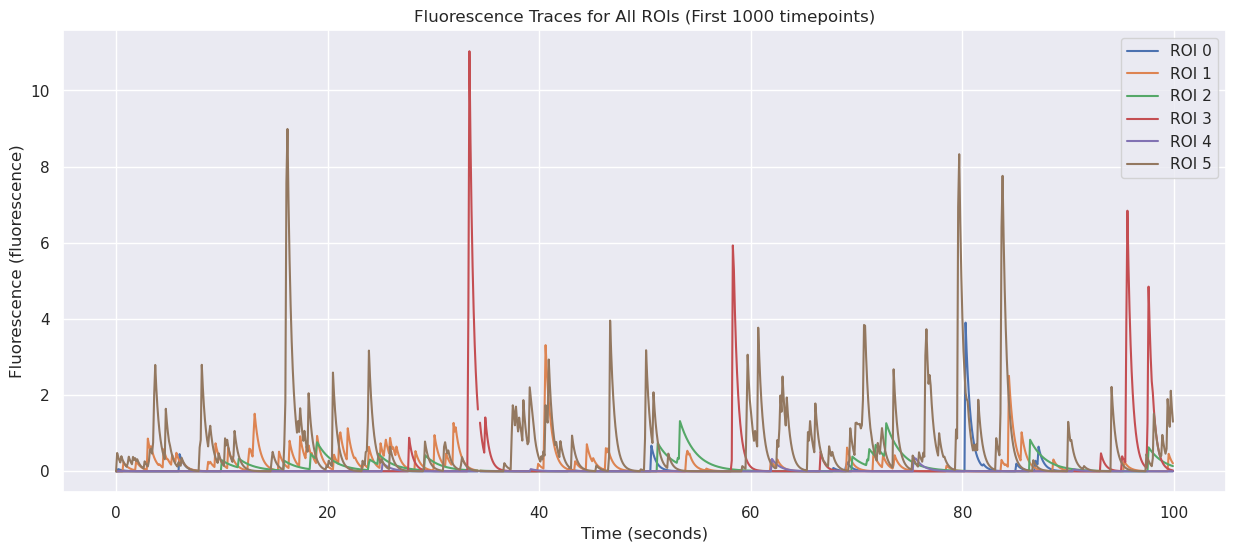

In [4]:
# Access the fluorescence data
try:
    fluorescence_module = nwbfile.processing['ophys']
    fluorescence_data_interface = fluorescence_module.data_interfaces['Fluorescence']
    roi_response_series = fluorescence_data_interface.roi_response_series['RoiResponseSeries']

    print(f"Fluorescence data shape: {roi_response_series.data.shape}")
    print(f"Number of ROIs: {roi_response_series.data.shape[1]}")
    print(f"Number of timepoints: {roi_response_series.data.shape[0]}")
    print(f"Data type: {roi_response_series.data.dtype}")
    print(f"Sampling rate: {roi_response_series.rate} Hz")
    print(f"Unit: {roi_response_series.unit}")

    # Load a subset of data for plotting (e.g., first 1000 timepoints)
    num_timepoints_to_plot = min(1000, roi_response_series.data.shape[0])
    fluorescence_subset = roi_response_series.data[:num_timepoints_to_plot, :]

    # Generate timestamps for the x-axis
    # Timestamps can be calculated from rate and starting_time if not explicitly stored
    if roi_response_series.timestamps is None:
        timestamps_subset = np.arange(num_timepoints_to_plot) / roi_response_series.rate + roi_response_series.starting_time
        time_unit = roi_response_series.starting_time_unit
    else:
        # If timestamps are stored, use them, but select the subset matching the data
        timestamps_subset = roi_response_series.timestamps[:num_timepoints_to_plot]
        time_unit = "seconds" # Assuming standard unit if directly available

    # Plotting
    sns.set_theme() # Apply seaborn styling
    plt.figure(figsize=(15, 6))
    for i in range(fluorescence_subset.shape[1]):
        # Get actual ROI ID if possible, otherwise use index
        roi_id = roi_response_series.rois.table.id[i] if hasattr(roi_response_series.rois.table, 'id') else i
        plt.plot(timestamps_subset, fluorescence_subset[:, i], label=f'ROI {roi_id}')

    plt.xlabel(f"Time ({time_unit})")
    plt.ylabel(f"Fluorescence ({roi_response_series.unit})")
    plt.title(f"Fluorescence Traces for All ROIs (First {num_timepoints_to_plot} timepoints)")
    # For a small number of ROIs, a legend is fine. For many, it becomes cluttered.
    if fluorescence_subset.shape[1] <= 10:
        plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

except KeyError as e:
    print(f"Could not find expected data for fluorescence traces: {e}")
except Exception as e:
    print(f"An error occurred while plotting fluorescence traces: {e}")

The plot above shows the fluorescence signals for the 6 ROIs over the first 100 seconds of the recording. We can observe transient increases in fluorescence, often referred to as calcium events, which are thought to correlate with neural spiking. The activity patterns vary across different ROIs.

## Visualizing ROI Image Masks

The `ImageSegmentation` interface usually stores the spatial footprints (masks) of the detected ROIs. Let's visualize these masks to see where the ROIs are located in the imaging field of view. We will plot a maximum projection of all ROI masks onto a single image.

Number of ROIs found in PlaneSegmentation: 6
Imaging plane dimensions (pixels): Height=318, Width=198


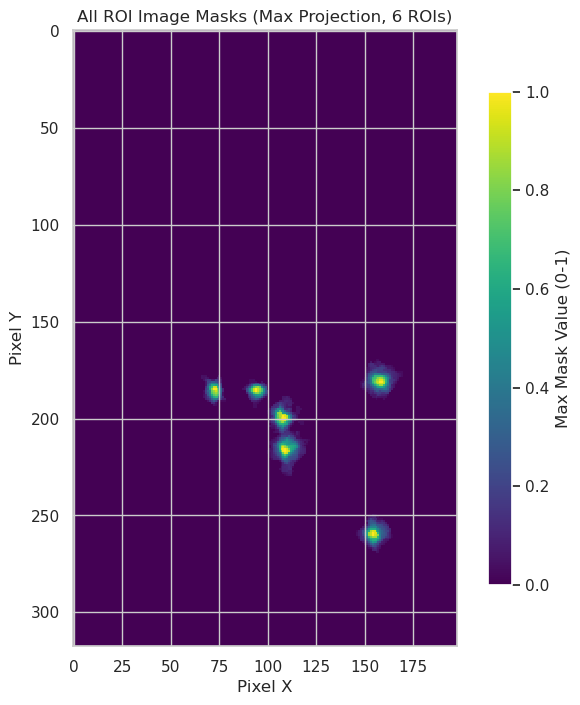

In [5]:
try:
    image_segmentation = nwbfile.processing['ophys']['ImageSegmentation']
    plane_segmentation = image_segmentation.plane_segmentations['PlaneSegmentation']

    print(f"Number of ROIs found in PlaneSegmentation: {len(plane_segmentation.id)}")
    
    # image_mask is a VectorData type, which needs to be indexed to get the numpy array
    # The shape of image_mask is (num_rois, height, width)
    all_image_masks = plane_segmentation['image_mask'][:] # This loads all masks into memory

    if all_image_masks.shape[0] > 0:
        # Create a composite image by taking the maximum value across all masks for each pixel
        composite_mask_image = np.max(all_image_masks, axis=0)
        
        # Get the shape of the imaging plane from one of the masks
        img_height, img_width = composite_mask_image.shape
        print(f"Imaging plane dimensions (pixels): Height={img_height}, Width={img_width}")

        plt.figure(figsize=(8, 8))
        # Do not use seaborn styling for imshow as it can interfere with colormaps and aspect ratio
        # plt.style.use('default') # Revert to matplotlib default for this plot if seaborn was set globally
        s = sns.axes_style("whitegrid") # Temporarily disable seaborn grid for this plot
        with s: # this ensures that the style is only applied to this plot
            plt.imshow(composite_mask_image, cmap='viridis', interpolation='nearest', aspect='equal')
        plt.title(f"All ROI Image Masks (Max Projection, {len(plane_segmentation.id)} ROIs)")
        plt.xlabel("Pixel X")
        plt.ylabel("Pixel Y")
        plt.colorbar(label="Max Mask Value (0-1)", shrink=0.8)
        plt.show()
    else:
        print("No ROI masks found to display.")

except KeyError as e:
    print(f"Could not find expected data for ROI masks: {e}")
except Exception as e:
    print(f"An error occurred while plotting ROI masks: {e}")

The plot above shows the spatial locations of the 6 ROIs identified in this recording session. Each colored region represents an ROI. The values in the image mask typically range from 0 to 1, indicating the contribution of each pixel to that ROI. This visualization helps understand the spatial relationships between the recorded neurons.

## Summary and Future Directions

This notebook demonstrated how to:
* Connect to the DANDI archive and retrieve metadata about a Dandiset.
* List assets within the Dandiset.
* Load a specific NWB file using its DANDI asset URL.
* Inspect basic metadata and structure of the NWB file.
* Visualize calcium imaging data, specifically:
    * Fluorescence traces over time for multiple ROIs.
    * Spatial image masks of these ROIs.

The chosen NWB file (`sub-F/sub-F_ses-20240213T110430_ophys.nwb`) contains one-photon calcium imaging data from subject 'F', including raw imaging series and processed data like fluorescence traces and ROI masks for 6 identified cells.

**Possible Future Directions for Analysis:**

1.  **Detailed Event Analysis:**
    *   Analyze the `EventAmplitude` data to study the characteristics (amplitude, duration) of detected calcium events.
    *   Correlate event times across different ROIs to look for neuronal synchrony or specific firing sequences.

2.  **Comparison Across Sessions/Subjects:**
    *   Extend this analysis to other NWB files in the Dandiset (e.g., different sessions for subject 'F', or data from other subjects like 'Q').
    *   Compare neuronal activity patterns or ROI characteristics across these different recordings.

3.  **Relating to Behavior (if applicable):**
    *   The Dandiset description mentions a "reaching task." If behavioral data (e.g., trial timings, task events) is available in NWB files associated with task performance, one could correlate neuronal activity with behavioral epochs. (Note: The currently analyzed file `sub-F_ses-20240213T110430_ophys.nwb` has a session description "Calcium imaging in SMA during the spontaneous condition," suggesting it might be resting-state data).

4.  **Advanced Visualization:**
    *   Create activity raster plots for ROIs.
    *   Plot correlation matrices of ROI activity.

5.  **Exploring Raw Imaging Data:**
    *   Access and visualize snippets of the raw imaging data from `acquisition/OnePhotonSeries`. This is very large data, so careful, selective loading would be essential.

This notebook provides a starting point. Researchers can adapt and expand upon these examples to delve deeper into the rich dataset provided by Dandiset 001174.

---
Remember to close the NWB file I/O object and the remote file object when you are done.

In [6]:
# It's good practice to close the file objects
try:
    nwb_io.close()
    remote_nwb_file.close() # remfile also needs to be closed
    print("NWB IO and remote file handles closed.")
except Exception as e:
    print(f"Error closing file handles: {e}")

NWB IO and remote file handles closed.


In [7]:
print("Notebook execution finished.")

Notebook execution finished.
